In [2]:
import matplotlib.pyplot as plt
import numpy as np

Labels -  [1, 2, 3, 4]


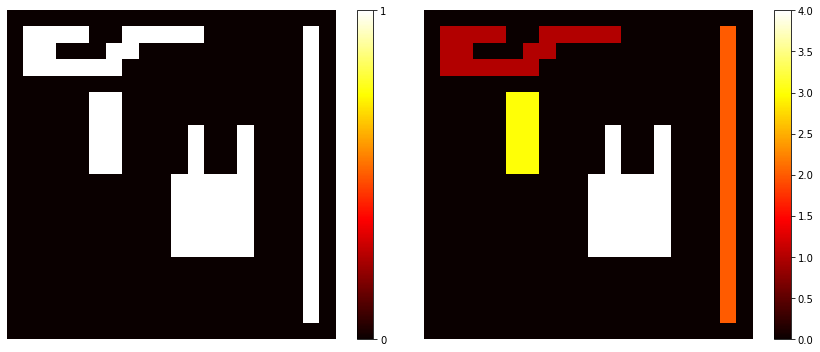

In [3]:
def negate(B):
    array = B.copy()
    array[np.where(array == 1)] = -1
    return array

def check(B, y, x):
    if not 0 <= x < B.shape[0]:
        return False
    if not 0 <= y < B.shape[1]:
        return False
    if B[y, x] != 0:
        return True
    return False

def neighbors2(B, y, x):
    left = y, x-1
    top = y - 1, x
    if not check(B, *left):
        left = None
    if not check(B, *top):
        top = None
    return left, top

def exists(neighbors):
    return not all([n is None for n in neighbors])

def find(label, linked):
    j = label
    while linked[j] != 0:
        j = linked[j]
    return j

def union(label1, label2, linked):
    j = find(label1, linked)
    k = find(label2, linked)
    if j != k:
        linked[k] = j
        
def relabel(image):
    old=[]
    for i in range(1,np.max(image)+1):
        if i in image:
            old.append(i)
    new=[i for i in range(1,len(old)+1)]
    for p, n in zip(old, new):
        image = recolor(image, p, n)
    return image

def recolor(image, oldc, newc):
    if oldc != newc:
        for y in range(image.shape[0]):
            for x in range(image.shape[1]):
                if image[y,x] == oldc:
                    image[y,x] = newc
    return image


def two_pass_labeling(B):
    linked = np.zeros(len(B), dtype="uint")
    labels = np.zeros_like(B)
    label = 1
    for row in range(B.shape[0]):
        for col in range(B.shape[1]):
            if B[row, col] != 0:
                n = neighbors2(B, row, col)
                if not exists(n):
                    m = label
                    label += 1
                else:
                    lbs = [labels[i] for i in n if i is not None]
                    m = min(lbs)
                labels[row, col] = m
                for i in n:
                    if i is not None:
                        lb = labels[i]
                        if lb != m:
                            union(m, lb, linked)
    for row in range(B.shape[0]):
        for col in range(B.shape[1]):
            if B[row, col] != 0:
                new_label = find(labels[row, col], linked)
                if new_label != labels[row, col]:
                    labels[row, col] = new_label
    return relabel(labels)

if __name__ == "__main__":
    B = np.zeros((20, 20), dtype='int32')
    
    B[1:-1, -2] = 1
    B[1, 1:5] = 1
    B[1, 7:12] = 1
    B[2, 1:3] = 1
    B[2, 6:8] = 1
    B[3:4, 1:7] = 1
    
    B[7:11, 11] = 1
    B[7:11, 14] = 1
    B[10:15, 10:15] = 1
    
    B[5:10, 5] = 1
    B[5:10, 6] = 1

    LB = two_pass_labeling(B)
    
    print("Labels - ", list(set(LB.ravel()))[1:])
    
    plt.figure(figsize=(12, 5))
    plt.subplot(121)

    plt.imshow(B, cmap="hot")
    plt.colorbar(ticks=range(int(2)))
    plt.axis("off")
    plt.subplot(122)
    
    plt.imshow(LB.astype("uint8"), cmap="hot")
    plt.colorbar()
    plt.axis("off")
    plt.tight_layout()
    plt.show()